In [4]:
!pip install xgboost

     -------------------------------------- 124.9/124.9 MB 4.0 MB/s eta 0:00:00


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.datasets import fetch_california_housing

california_data = fetch_california_housing()
df = pd.DataFrame(california_data.data, columns = california_data.feature_names)
df["MedHouseVal"] = california_data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
x = df.drop("MedHouseVal", axis =1)
y = df["MedHouseVal"]

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size =0.2 , random_state=42)

In [10]:
xg_reg = XGBRegressor()

xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [11]:
y_pred = xg_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.2225899267544737


In [14]:
xg_reg.feature_importances_ #(importance of any feature, more value more importance feature)

array([0.48962253, 0.07005818, 0.04309093, 0.0256776 , 0.02472801,
       0.14858009, 0.09029018, 0.1079525 ], dtype=float32)

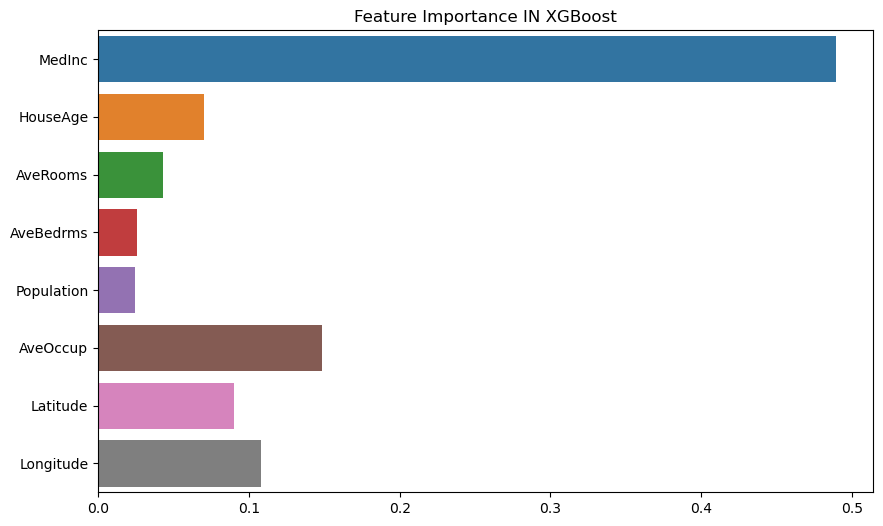

In [13]:
# plotting feature importance

plt.figure(figsize=(10,6))
sns.barplot(x=xg_reg.feature_importances_, y = x.columns)
plt.title("Feature Importance IN XGBoost")
plt.show()